# Laboratorio 7 - Arquitectura de Computadoras 23-1

Alumno: Estéfano Machado Ferrer (20181753)

Fecha: 11-05-2023

Curso y Horario: Arquitectura de Computadoras (1IEE14) - Horario de Laboratorio 0621

## Enunciado General


Se le brinda dos códigos en C: programa1_1.c y Programa1_2.c. Ambos generan el cálculo de la transpuesta de una matriz pero se han implementado de diferentes maneras. Considerar que N = 512 puede ser un número muy grande para su sistema. En caso se genere un error de segmento, use el valor de N que funcione con su código.

Se le pide lo siguiente:


## Parte 1

1) (1.0 punto) Incluir la medición de tiempo desde C únicamente para el cálculo de la transpuesta. Utilice las unidades que mejor se ajusten al tiempo de ejecución de su PC. No usar más de dos decimales.

Ahora procederemos a editar ambos programas dados (sobreescribiendo las files) para incluír las mediciones de tiempo requeridas:

In [25]:
%%file programa1_1.c

#include <stdio.h>
#include <time.h> //Usamos la librería time.h para realizar las mediciones de tiempo de ejecución

int main()
{
    int N = 512;
    int matriz[N][N];
    int transpuesta[N][N];

    //Mediremos el tiempo de ejecución a partir de que se calcula la matriz transpuesta
    struct timespec ti, tf; //declaramos las variables en las que mediremos el tiempo de ejecución
    double t_elapsed; //declaramos la variable en la que guardaremos el cálculo del tiempo de ejecución


    for (int i = 0; i<N; i++){
        for(int j = 0; j<N;j++){
            matriz[i][j] = i+j*N;
        }
    }
    clock_gettime(CLOCK_REALTIME, &ti); //Inicio de la medición tiempo de ejecución

    for (int i = 0; i<N; i++){
        for(int j = 0; j<N;j++){
            transpuesta[i][j] = matriz[j][i];
        }
    }
    clock_gettime(CLOCK_REALTIME, &tf); //Fin de la medición tiempo de ejecución

    //Calculamos el tiempo de ejecución y lo imprimimos en el terminal
    t_elapsed = (tf.tv_sec - ti.tv_sec) * 1e9 + (tf.tv_nsec - ti.tv_nsec);
    printf("El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es %.2f nanosegundos.\n", t_elapsed);

    return 0;
}

Overwriting programa1_1.c


In [26]:
%%file programa1_2.c

#include <stdio.h>
#include <time.h> //Usamos la librería time.h para realizar las mediciones de tiempo de ejecución

int main()
{
    int N = 512;
    int matriz[N][N];
    int transpuesta[N][N];

    //Mediremos el tiempo de ejecución a partir de que se calcula la matriz transpuesta
    struct timespec ti, tf; //declaramos las variables en las que mediremos el tiempo de ejecución
    double t_elapsed; //declaramos la variable en la que guardaremos el cálculo del tiempo de ejecución

    for (int i = 0; i<N; i++){
        for(int j = 0; j<N;j++){
            matriz[i][j] = i+j*N;
        }
    }
    
    clock_gettime(CLOCK_REALTIME, &ti); //Inicio de la medición tiempo de ejecución

    for (int i = 0; i<N; i++){
        for(int j = 0; j<N;j++){
            transpuesta[j][i] = matriz[i][j];
        }
    }

    clock_gettime(CLOCK_REALTIME, &tf); //Fin de la medición tiempo de ejecución

    //Calculamos el tiempo de ejecución y lo imprimimos en el terminal
    t_elapsed = (tf.tv_sec - ti.tv_sec) * 1e9 + (tf.tv_nsec - ti.tv_nsec);
    printf("El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_2.c es %.2f nanosegundos.\n", t_elapsed);

    return 0;
}

Overwriting programa1_2.c


Procedemos a compilar y generar ejecutables para ambos programas dados:

In [27]:
! gcc programa1_1.c -o programa1_1 & ! gcc programa1_2.c -o programa1_2

Ahora procedemos a realizar la ejecución de ambos programas una vez para comprobar su correcto funcionamiento

In [28]:
! ./programa1_1

El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es 2854113.00 nanosegundos.


In [29]:
! ./programa1_2

El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_2.c es 2991077.00 nanosegundos.


## Parte 2

2) (1.0 punto) Realizar 15 ejecuciones desde el terminal para ambos archivos ejecutables. Realizar una captura de pantalla de su ejecución. Los tiempos en su imagen deben ser visibles. Para ello, se sugiere escribir un código en bash que realice el llamado 15 veces al programa ejecutable (Ver guía de introducción al entorno). El código en bash es opcional.

Realizaremos un código de un for loop en bash para realizar las 15 ejecuciones deseadas:

Buscamos el directorio donde està el intérprete de bash de mi máquina virtual para utilizar #shebang correctamente

In [30]:
! which bash

/usr/bin/bash


Procedemos a crear ahora el archivo del código en bash que necesitaremos:

In [31]:
%%file parte2_15iteraciones.sh
#!/bin/bash

#Ciclo iterativo que realize 15 ejecuciones de ambos programas:

for ((i=1; i<=15; i++))
do
    echo "Ejecución $i:"
    ./programa1_1
    ./programa1_2
done

Writing parte2_15iteraciones.sh


In [32]:
! chmod 777 ./parte2_15iteraciones.sh #nos aseguramos de que sea ejecutable dándole permisos de read/write and execute

In [33]:
! ./parte2_15iteraciones.sh #ejecutamos el script

Ejecución 1:
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es 10620771.00 nanosegundos.
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_2.c es 2607208.00 nanosegundos.
Ejecución 2:
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es 26530934.00 nanosegundos.
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_2.c es 15090412.00 nanosegundos.
Ejecución 3:
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es 6758945.00 nanosegundos.
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_2.c es 11303564.00 nanosegundos.
Ejecución 4:
El tiempo de ejecución del cálculo de la transpuesta de la matriz generada realizado por el programa1_1.c es 8617380.00 nanosegundos.
El tie

## Parte 3

3) (1.0 punto) Adjuntar una tabla con todas las mediciones. Enfatizar el tiempo mínimo, máximo y la mediana.

A continuación se adjunta la tabla pedida (generada en Excel, se adjunta también el .xlsx en el comprimido en Paideia):

<div>
<img src="Imagen_Tabla_Tiempos_Ejecucion.png" width="1000"/>
</div>

## Parte 4

4) (1.0 punto) Explicar cómo se relaciona el programa1_1.c con los conceptos de localidad temporal y localidad espacial.

Primero analizaremos la localidad temporal y la localidad espacial respecto a la inicialización/generación de la matriz `matriz`, la cual se popula de elementos accediendo primero a llenar cada fila, y pues de esta manera se guarda en las direcciones de la memoria caché (arreglo lineal), en forma row-major:

La localidad temporal se refiere a la tendencia de los programas a acceder a los mismos datos en un corto periodo de tiempo.
En el caso del programa `programa1_1.c`, se puede observar que el acceso a los datos de la matriz `matriz` es constante, ya que
se accede a los mismos datos en cada iteración del ciclo for. Por lo tanto, se puede decir que el programa tiene una buena localidad
temporal, ya que accede a los mismos datos en un corto periodo de tiempo.

La localidad espacial se refiere a la tendencia de los programas a acceder a datos cercanos en memoria. Respecto a Dado que, como se mencionó anteriormente, en `programa1_1.c` el acceso a los datos de la matriz `matriz` es constante en cada iteración del ciclo for y a, podemos se puede decir que el programa tiene una buena localidad espacial, ya que accede a
datos cercanos en memoria.

Ahora analicemos respecto al cálculo de la transpuesta:

Tenemos nuevamente buena localidad temporal, al acceder en cada ciclo iterativo a la matriz `matriz`, pero la localidad espacial es pobre, dado que se está accediendo a la matriz `matriz` de manera columna a columna (col-major), cuando esta está guardada en memoria de manera fila a fila (row-major). Por lo tanto, tendremos que no se accederán a datos cercanos, y por lo tanto no gozaremos de buena localidad espacial

## Parte 5

5) (1.0 punto) Explicar cómo se relaciona el programa1_2.c con los conceptos de localidad temporal y localidad espacial.

El análisis de localidad temporal y localidad espacial respecto a la inicialización/generación de la matriz `matriz` es idéntico al caso del programa `programa1_1.c`, ya que se genera de la misma manera dicha matriz (en manera row-major). Sin embargo, al analizar la localidad espacial del acceso a la matriz `matriz` cuando se tiene que se accede a esta de manera row-major, tenemos que esta implementación debe tener excelente localidad espacial, debido a que se está accediendo a datos en memoria que son guardados de manera cercana al accederse a todos los elementos fila a fila, tal cual se  ha generado la matriz original.

## Parte 6

6) (3.0 punto) Sabiendo que la matriz se ha inicializado por filas (row-major), ¿qué pasaría si se inicializa la matriz por columnas (col-major) y se ajusta la función de transpuesta a columnas?Justificar apropiadamente sus respuestas.

Como se ha discutido anteriormente, el acceso a la matriz `matriz` por filas o columnas determina la localidad espacial de la implementación, por lo que si se inicializa de manera col-major, tendríamos que la implementación del programa `programa1_1` estaría accediendo a estos elementos tal como están guardados en memoria, lo cual haría que esta sea más eficiente y no la de `programa1_2`.

## Parte 7

7) (0.0 puntos) Utilizar el comando getconf -a | grep CACHE en el terminal y verificar el tamaño de bloque de su computador. Recordar que el tamaño de bloque en el nivel 1 se ve en la línea LEVEL1_DCACHE_LINESIZE (en bytes). Adjuntar captura de pantalla. (-1.0 si no lo realiza)

In [34]:
! getconf -a | grep CACHE

LEVEL1_ICACHE_SIZE                 65536
LEVEL1_ICACHE_ASSOC                
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 65536
LEVEL1_DCACHE_ASSOC                2
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  524288
LEVEL2_CACHE_ASSOC                 16
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  16777216
LEVEL3_CACHE_ASSOC                 16
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  
LEVEL4_CACHE_ASSOC                 
LEVEL4_CACHE_LINESIZE              


In [35]:
# También para tener más contexto utilizaremos el siguiente comando que nos permite ver la información del
# tamaño de la caché de nuestra computadora

! lscpu | grep cache

L1d cache:                       64 KiB (1 instance)
L1i cache:                       64 KiB (1 instance)
L2 cache:                        512 KiB (1 instance)
L3 cache:                        16 MiB (1 instance)


## Parte 8

8) (4.0 puntos) Basándose en todas las respuestas de los incisos anteriores, ¿qué implementación genera mejores tiempos de ejecución? Justificar su respuesta y responder si es que las implementaciones representan realmente una diferencia significativa.

Teóricamente, como se ha venido discutiendo, esperaríamos que la implementación que genere mejores tiempos de ejecución sea la de `programa1_2`, dado a que tiene mejor localidad espacial al acceder a cada elemento de la matriz `matriz` de la misma manera como estos están guardados en la caché, es decir en forma row-major.

Experimentalmente, la implementación del `programa1_2` genera mejores (menores) tiempos de ejecución. Para justificar esto, realizaremos una gráfica del Tiempo de Ejecución vs Iteración (utilizando un filtro mediana para suavizar la tendencia de los mismos) para analizar la tendencia general de los tiempos de ejecución de ambos programas

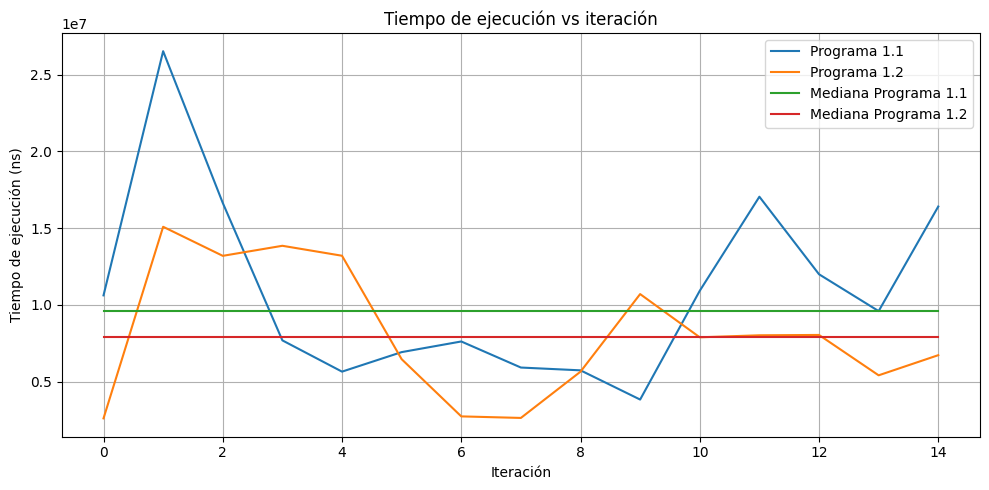

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

num_iteraciones = 15
array_iteraciones = range(num_iteraciones)


def filtro_mediana(sign, ventana):
    #Filtro mediana para suavizar la tendencia del arreglo y descartar outliers
    signc = []
    tam = len(sign)
    offs = int((ventana-1)/2)
    for i in range(tam):
        inicio = i - offs if (i - offs > 0) else i
        fin = i + offs if (i + offs < tam) else tam
        signc.append(statistics.median(sign[inicio:fin]))
    return signc

#Definimos listas con los tiempos de ejecución obtenidos
t_programa1_1 = [10620771.00,26530934.00,6758945.00,8617380.00,2686183.00,\
                11160607.00,4073770.00,7763657.00,3708881.00,3955806.00,\
                17884601.00,16212106.00,7780652.00,11411556.00,21407584.00]
t_programa1_2 = [2607208.00,15090412.00,11303564.00,16400014.00,10005958.00,\
                2922112.00,2550230.00,2720179.00,8580410.00,12829127.00,\
                2948110.00,13092049.00,2992097.00,7831652.00,5616317.00]

#Aplicamos el filtro de mediana a los tiempos de ejecución
t_programa1_1 = filtro_mediana(t_programa1_1, 3)
t_programa1_2 = filtro_mediana(t_programa1_2, 3)

#También plotearemos la mediana de los tiempos de ejecución para tener una mejor idea de la tendencia
t_programa1_1_mediana = [statistics.median(t_programa1_1)]*num_iteraciones
t_programa1_2_mediana = [statistics.median(t_programa1_2)]*num_iteraciones


#Ahora mostraremos las gráficas de tiempo de ejecución vs iteración para ambos programas, así como la mediana de los mismos
plt.figure(figsize=(10,5))
plt.plot(array_iteraciones, t_programa1_1, label='Programa 1.1')
plt.plot(array_iteraciones, t_programa1_2, label='Programa 1.2')
plt.plot(array_iteraciones, t_programa1_1_mediana, label='Mediana Programa 1.1')
plt.plot(array_iteraciones, t_programa1_2_mediana, label='Mediana Programa 1.2')
plt.xlabel('Iteración')
plt.ylabel('Tiempo de ejecución (ns)')
plt.title('Tiempo de ejecución vs iteración')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


Como podemos observar, experimentalmente tenemos que la implementación de `programa1_2` es la que genera mejores tiempos de ejecución. Veamos ahora cuán significativa es esta diferencia realizando un cálculo de porcentaje de mejora respecto a la mediana de ambos arreglos de tiempos de ejecución:

In [51]:
mejora = 100-t_programa1_2_mediana[0]/t_programa1_1_mediana[0]*100
print(f"La mejora en tiempos de ejecución del programa1_2 respecto al programa1_1 es de {mejora:.3} %")

La mejora en tiempos de ejecución del programa1_2 respecto al programa1_1 es de 17.8 %


La diferencia no es tan significativa en este caso, pero definitivamente podría volverse significativa si es que aumentamos el tamaño de la matriz y trabajamos con más elementos, o si se disminuyera el tamaño del bloque de la caché y esto hiciera que tuviésemos que usar más de un bloque para guardar un dato, alejando más a los datos distintos, y haciendo que acceder de manera distinta a como estos están guardados tarde más.

## Parte 9

9) (3.0 puntos) ¿Cómo influye el tipo de datos del arreglo en este ejercicio? Esperaría resultados similares para un tipo char, short, long? Comentar acerca de su respuesta.

El tipo de dato usado para cada elemento de las matrices con las que se opera en ambos programas es `int`, el cual es un tipo de dato de 4 bytes (para C en 64 bits). El hecho de que el tamaño del bloque en en nivel 1 de la cache, como se vio en la parte 7, es de 64 bytes, quiere decir que siempre tendremos suficiente espacio para guardar un dato en un bloque de la cache (más las respectivas etiquetas u offsets asociados al tipo de mapeo que se esté realizando), pues este solo ocupa 4 bytes, y por lo tanto, tendremos que podremos gozar de una buena localidad espacial al guardar en la caché (analizando desde el punto de vista simplemente del tipo de dato y no del acceso a cada dato en el código, análisis que ya realizamos previamente al discutir el acceso por row-major o col-major). Esto lo podemos ver tangiblemente al pensar en el hit rate, el cual será de 63/64 (solo hay un miss la primera vez cuando se guarda el dato), incluso si es que (como es el caso) no todo el array de 1MiB = 1 048 576 bytes cabrá en la cache.

El tipo de dato `char` tiene un tamaño de 1 byte, `short` tiene un tamaño de 2 bytes y `long` tiene un tamaño de 4 bytes. Al ser estos tres tipos de datos de menor (`char` y `short`) o igual (`long`) tamaño que el tipo de dato `int`, tenemos que estos nos deberían dar resultados similares a los dados por `int`.